# Dependencies

In [ ]:
!python -c 'import tensorflow; print(tensorflow.__version__)'

2020-07-20 14:22:31.808763: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2.2.0


In [1]:
!pip install tensorflow==1.15

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
import numpy as np
from keras import regularizers, constraints

Using TensorFlow backend.


# GAN

In [2]:
class GAN():
  def __init__(self):
    self.img_rows = 28
    self.img_cols = 28
    self.channels = 1
    self.img_shape = (self.img_rows, self.img_cols, self.channels)
    self.latent_dim = 128
    optimizer = Adam(0.0002, 0.5) 
    self.discriminator = self.build_discriminator()
    self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        
    self.generator = self.build_generator()

#-------------------------------------------------------------------------
    z = Input(shape=(self.latent_dim,))
    print('--------------------------------')
    print('This is z :' , z)
    print('This is z.shape :' , z.shape)
        

#--------------------------------------------------------------------------
    img = self.generator(z)
    print('--------------------------------')
    print('Image shape: ', img.shape)

    self.discriminator.trainable = False

#-----------------------------------------------------------------------------
    validity = self.discriminator(img)
    print('--------------------------------')
    print('Validity: ', validity)
    print('--------------------------------')
    print('Type of validity:', type(validity))

    self.combined = Model(z, validity)
    self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    
  def build_generator(self):
    model = Sequential()
    model.add(Dense(256, input_dim=self.latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(self.img_shape), activation='tanh'))
    model.add(Reshape(self.img_shape))
    model.summary()
    noise = Input(shape=(self.latent_dim,))
    img = model(noise)
    return Model(noise, img)
        
  def build_discriminator(self):
    model = Sequential()
    model.add(Flatten(input_shape=self.img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    
#-------------------------------------------------------------------------------------
 #   model.add(MinibatchDiscrimination(4, 4, input_dim = (256,)))
 #   model.add(Reshape((16,16)))
 #   model.add(Flatten())
#------------------------------------------------------------------------------------

    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    img = Input(shape=self.img_shape)
    validity = model(img)
    return Model(img, validity)


  #def train(self, epochs, batch_size=128, sample_interval=60):
  def train(self, epochs, batch_size, sample_interval):
    (X_train, _), (_, _) = mnist.load_data()
    
#-------------------------------------------------------------------
    #print('x train [0]:', X_train[0] , ' its shape:', X_train[0].shape) ---------> 28*28

    X_train = X_train / 127.5 - 1.
    X_train = np.expand_dims(X_train, axis=3)
    #print('new x train[0] :', X_train[0] , ' its shape:', X_train[0].shape) ------> 28*28*1
      
      
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    print('--------------------------------')
    print('valid.shape inside training:', valid.shape)
    print('--------------------------------')
    print('fake.shape inside training:', fake.shape)


    for epoch in range(epochs):
      #-------------------------------------------------------------------------
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      print('--------------------------------')
      print("this is idx.shape: ", idx.shape)

      imgs = X_train[idx]
      print('--------------------------------')
      #print('imgs.shape:', imgs.shape)
        
      noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
      #print('noise:', noise)
      gen_imgs = self.generator.predict(noise)
      #print('gen_imgs', gen_imgs)
      #print('hello')
          
      #-------------------------------------------------------------------------------------------
      d_loss_real = self.discriminator.train_on_batch(imgs, valid)
      print('--------------------------------')
      print('d loss real', d_loss_real)

      d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
      print('--------------------------------')
      print('d loss fake', d_loss_fake)

      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
      print('--------------------------------')
      print(' d_ loss ' , d_loss)
          
# ------------------------------------------------------------------------------------------------
 #its shape --> zeros
      #mean_samples =   np.zeroes((1, self.latent_dim))
      #for i in range(1, batch_size):
      #  other_samples_noise = np.random.normal(0, 1, (1, self.latent_dim))
      #  mean_samples = mean_samples + noise
      #mean_samples = mean_samples/(batch_size-1)

      #first_sample_noise = noise = np.random.normal(0, 1, (1, self.latent_dim))

      #g_discrimination = 


# --------------------------------------------------------------------------------------------------
 #its shape --> zeros (initialize)
      #mean_samples =   np.zeroes((1, self.latent_dim))
      #max_discrimination = vector
     
      #other_samples_noise = np.random.normal(0, 1, ((batch_size -1), self.latent_dim))
      #mean_samples = other_samples_noise #(jam besham ruye sutun)
      #mean_samples = mean_samples/(batch_size-1) #taghsim beshan be tedad vas miyangin gereftan
        
      #first_sample_noise = np.random.normal(0, 1, (1, self.latent_dim))
      #discrimination = first_sample_noise - mean_samples

      #fake_generated_sample_1 = self.generator.predict(first_sample_noise)
      #fake_generated_sample_2 = self.generator.predict(discrimination)

      #use mean squer for calculating the distance
      #discrimination = fake_generated_sample_1 - fake_generated_sample_2

      #g_discrimination = 
# ------------------------------------------------------------------------------------------------

      noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

# ------------------------------------------------------------------------------------------------
      fake_images = self.generator.predict(noise)
      g_loss_discrimination = 1/(np.linalg.norm(fake_images))

      new_noise = noise - g_loss_discrimination


      #print('first loss discrimination : ', g_loss_discrimination)

      #while g_loss_discrimination < 0.001:
      #  noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
      #  fake_images = self.generator.predict(noise)
      #  g_loss_discrimination = 1/(np.linalg.norm(fake_images))

      #print('loss discrimination after while :', g_loss_discrimination)
      
      # generator train on batch (generator with two out put)
# ------------------------------------------------------------------------------------------------

      #g_loss = self.combined.train_on_batch(noise, valid)
      
      g_loss = self.combined.train_on_batch(new_noise, valid)
      

# ------------------------------------------------------------------------------------------------
      #g_loss_new = g_loss * g_loss_discrimination
      #print('g_loss_new:' , g_loss_new)
# ------------------------------------------------------------------------------------------------


      print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
      if epoch % sample_interval == 0:
        self.sample_images(epoch)

  def sample_images(self, epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, self.latent_dim))
    gen_imgs = self.generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
      for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
      #fig.savefig("images/%d.png" % epoch)
      plt.close()

In [3]:
if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=1000, batch_size=128, sample_interval=1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params:

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


--------------------------------
d loss real [1.2756594, 0.0078125]
--------------------------------
d loss fake [0.63064, 0.90625]
--------------------------------
 d_ loss  [0.9531497  0.45703125]
0 [D loss: 0.953150, acc.: 45.70%] [G loss: 1.051904]
--------------------------------
this is idx.shape:  (128,)
--------------------------------
--------------------------------
d loss real [0.1863293, 1.0]
--------------------------------
d loss fake [0.6005695, 0.8671875]
--------------------------------
 d_ loss  [0.3934494  0.93359375]
1 [D loss: 0.393449, acc.: 93.36%] [G loss: 0.991037]
--------------------------------
this is idx.shape:  (128,)
--------------------------------
--------------------------------
d loss real [0.05741883, 1.0]
--------------------------------
d loss fake [0.564662, 0.96875]
--------------------------------
 d_ loss  [0.3110404 0.984375 ]
2 [D loss: 0.311040, acc.: 98.44%] [G loss: 1.020250]
--------------------------------
this is idx.shape:  (128,)
---

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
this is idx.shape:  (128,)
--------------------------------
--------------------------------
d loss real [0.5168233, 0.9296875]
--------------------------------
d loss fake [0.7830821, 0.296875]
--------------------------------
 d_ loss  [0.6499527  0.61328125]
500 [D loss: 0.649953, acc.: 61.33%] [G loss: 0.768701]
--------------------------------
this is idx.shape:  (128,)
--------------------------------
--------------------------------
d loss real [0.50676405, 0.9453125]
--------------------------------
d loss fake [0.7713149, 0.2421875]
--------------------------------
 d_ loss  [0.6390395 0.59375  ]
501 [D loss: 0.639040, acc.: 59.38%] [G loss: 0.774122]
--------------------------------
this is idx.shape:  (128,)
--------------------------------
--------------------------------
d loss real [0.53111595, 0.890625]
--------------------------------
d loss fake [0.76544255, 0.2421875]
--------------------------------
 d_ loss  [0.6482

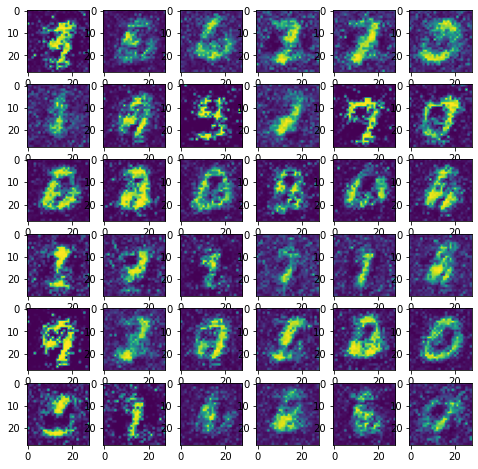

In [4]:
import matplotlib.pyplot as plt

noise = np.random.normal(0, 1, (36,128))
gen_imgs = gan.generator.predict(noise)
gen_imgs.shape

fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  a = np.reshape(gen_imgs[i-1], (28,28))
  plt.imshow(a)
plt.show()

Model with new noise (with multiply):

In [5]:
noise = np.random.normal(0, 1, (20,128))
gen_imgs = gan.generator.predict(noise)
gen_imgs.shape

(20, 28, 28, 1)

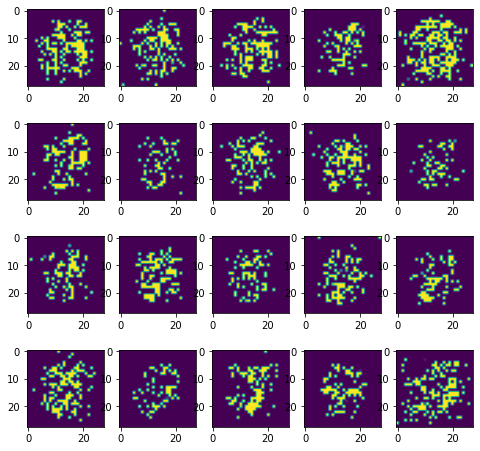

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  a = np.reshape(gen_imgs[i-1], (28,28))
  plt.imshow(a)
plt.show()

Baseline:

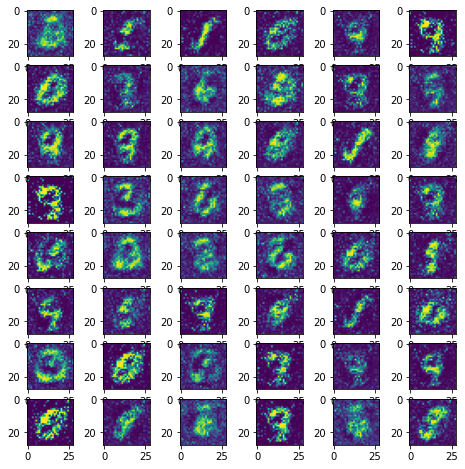

In [8]:
noise = np.random.normal(0, 1, (48,128))
gen_imgs = gan.generator.predict(noise)
gen_imgs.shape

fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 8
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  a = np.reshape(gen_imgs[i-1], (28,28))
  plt.imshow(a)
plt.show()

Model with while:

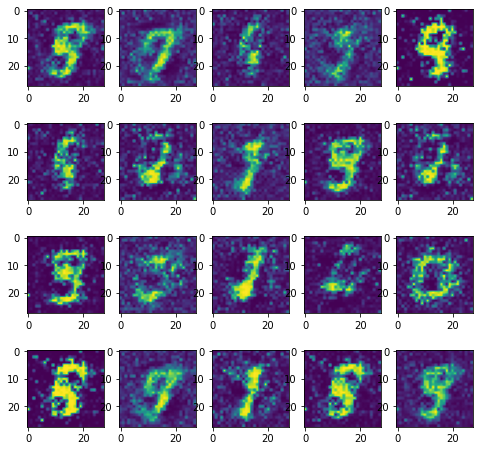

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
  fig.add_subplot(rows, columns, i)
  a = np.reshape(gen_imgs[i-1], (28,28))
  plt.imshow(a)
plt.show()

# Extra

In [ ]:
noise = np.random.normal(0, 1, (64, 100))
gen_imgs = gan.generator.predict(noise)
g_loss_discrimination = -np.linalg.norm(gen_imgs)
g_loss_discrimination

-43.594784